#### Lib Import

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f

In [26]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep =',')


data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['id'] >= 1]



In [38]:
unique = data1['id'].unique()
indexes_good = []
for id in unique:
    if data1.loc[data1['id'] == id]['temperatureAvg'].mean() > 2500:
        indexes_good += [id]
query = data1['id'].apply(lambda x: x in indexes_good)
data1 = data1.loc[query]
data1

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
131,932,180.6451,1644576689178,0.591667,0.459259,0.064583,0.170370,1644576688996,0.658854,0.534722,0.132812,0.256944,3042.068,318.343600,2429,3436,1903.270,338.6669,0.002670,-1
132,932,180.6451,1644576689392,0.550000,0.462963,0.064583,0.148148,1644576689196,0.653646,0.538194,0.130208,0.253472,2507.286,6.648615,2496,2513,1597.425,208.3247,0.002670,-1
133,932,180.6451,1644576689562,0.518750,0.451852,0.064583,0.162963,1644576689395,0.575521,0.541667,0.130208,0.222222,2461.787,742.429900,1504,3453,1882.985,734.6662,0.092545,-1
134,932,175.0000,1644576689758,0.504167,0.448148,0.066667,0.159259,1644576689595,0.507812,0.524306,0.132812,0.243056,3205.554,224.050400,2515,3466,1681.108,332.6178,0.092545,-1
135,932,180.6452,1644576689970,0.497917,0.440741,0.064583,0.159259,1644576689796,0.484375,0.517361,0.132812,0.243056,3194.449,233.510100,2481,3461,1686.797,316.1814,0.092545,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,970,169.6969,1644576964665,0.568750,0.537037,0.068750,0.144445,1644576964601,0.611979,0.652778,0.132812,0.218750,3117.711,354.263400,1540,3418,1625.974,283.9500,0.092545,-1
1180,970,169.6969,1644576964931,0.577083,0.529630,0.068750,0.151852,1644576964801,0.619792,0.642361,0.143229,0.225694,3138.057,296.366600,2264,3429,1640.540,306.4276,0.092545,-1
1181,970,175.0000,1644576965032,0.589583,0.548148,0.066667,0.144445,1644576965002,0.648438,0.659722,0.135417,0.222222,3221.924,206.192400,2448,3393,3079.993,343.3955,0.002670,-1
1182,970,175.0000,1644576965032,0.589583,0.548148,0.066667,0.144445,1644576965201,0.656250,0.666667,0.135417,0.218750,2757.790,156.940500,2404,3319,2113.617,391.4043,0.002670,-1


In [39]:
x = []
for id in data1['id'].unique():
    x += [data1.loc[data1['id'] == id]['temperatureAvg'].mean()]
x

[3171.2381562499995,
 3162.1752816901417,
 3113.186254901962,
 3160.834,
 3191.7817272727266,
 3215.0570526315787,
 3225.0301904761895,
 3174.928301075269,
 3178.2106500000004,
 3240.721368421053,
 3059.354139240506,
 3078.8293636363637,
 2983.0818,
 3126.4483333333337,
 3103.335,
 3261.1041800000003,
 3316.5921764705877,
 3249.594176470588,
 3188.9183333333335,
 2825.176323529411,
 3198.7799285714286,
 3205.3712727272728,
 3132.7926666666667,
 3157.6553529411767,
 3124.0663636363633,
 3095.152000000001,
 2864.0106666666666,
 2854.680714285714,
 2826.9501,
 3116.017352941177,
 2779.51625]

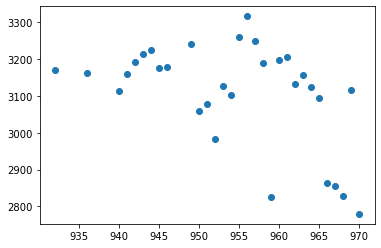

In [40]:
fig = plt.scatter(data1['id'].unique(),x)

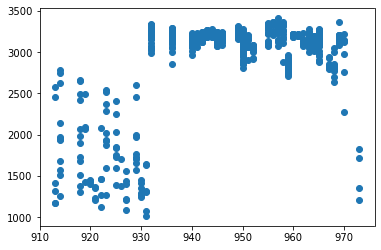

In [9]:
model1 = f.Model(data1, number_of_rows = 3)
model1.filter(sigma = 2)
plt.scatter(model1.df_all['id'],model1.df_all['temperatureAvg'])

In [ ]:
model1.df_all.describe()

In [ ]:
data1